In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import scipy

In [3]:
class Option:
    def __init__(self,S, K, r, q, vol, T, IsCall, IsEuropean, Div):
        self.S = S # spot price
        self.K = K # strike price
        self.r = r # risk-free rate
        self.q = q # dividend rate
        self.vol = vol # volatility
        self.T = T # time to maturity in years
        self.IsCall = IsCall # True for call, False for put
        self.IsEuropean = IsEuropean #True for European's option, False for American's option
        self.Div = Div #Veuillez entrez les dividendes dans une liste de tuples. Ex:[(1, 50), (2,50)...(Maturité en années, Montant en euros]

    def price_BSM(self):
        if self.IsEuropean == False:
            raise ValueError("L'option doit être de type Européen")
        if self.Div != None:
            try:
                if isinstance(self.Div, list) and all(isinstance(t, tuple) for t in self.Div):
                    None
                else:
                    print("Erreur : Vous devez entrer une liste de tuples.")
            except (SyntaxError, ValueError):
                print("Erreur : Format invalide.")
            PV_div = 0
            for div in self.Div:
                if div[0] <= self.T:
                    PV_div += div[1] * np.exp(-self.r * div[0])
            S = self.S - PV_div
        else:
            S = self.S
        d1 = (np.log(S/self.K) + (self.r - self.q + 0.5*self.vol**2)*self.T) / (self.vol*np.sqrt(self.T))
        d2 = d1 - self.vol * np.sqrt(self.T)
        if self.IsCall:
            price = S * np.exp(-self.q * self.T) * norm.cdf(d1) - self.K * np.exp(-self.r*self.T) * norm.cdf(d2)
        else:
            price = self.K * np.exp(-self.r * self.T) * norm.cdf(-d2) - S * np.exp(-self.q * self.T) * norm.cdf(-d1)
        return price

    def delta(self):
        if self.IsEuropean == False:
            raise ValueError("L'option doit être de type Européen")
        if self.Div != None:
            try:
                if isinstance(self.Div, list) and all(isinstance(t, tuple) for t in self.Div):
                    None
                else:
                    print("Erreur : Vous devez entrer une liste de tuples.")
            except (SyntaxError, ValueError):
                print("Erreur : Format invalide.")
            PV_div = 0
            for div in self.Div:
                if div[0] <= self.T:
                    PV_div += div[1] * np.exp(-self.r * div[0])
            S = self.S - PV_div
        else:
            S = self.S
        d1 = (np.log(S/self.K) + (self.r - self.q + 0.5*self.vol**2)*self.T) / (self.vol*np.sqrt(self.T))
        if self.IsCall:
            delta = np.exp(-self.q * self.T) * norm.cdf(d1)
        else:
            delta = np.exp(-self.q * self.T) * (norm.cdf(d1)-1)
        return delta

    def gamma(self):
        if self.IsEuropean == False:
            raise ValueError("L'option doit être de type Européen")
        if self.Div != None:
            try:
                if isinstance(self.Div, list) and all(isinstance(t, tuple) for t in self.Div):
                    None
                else:
                    print("Erreur : Vous devez entrer une liste de tuples.")
            except (SyntaxError, ValueError):
                print("Erreur : Format invalide.")
            PV_div = 0
            for div in self.Div:
                if div[0] <= self.T:
                    PV_div += div[1] * np.exp(-self.r * div[0])
            S = self.S - PV_div
        else:
            S = self.S
        d1 = (np.log(S/self.K) + (self.r - self.q + 0.5*self.vol**2)*self.T) / (self.vol*np.sqrt(self.T))
        gamma = np.exp(-self.q * self.T) * norm.pdf(d1)/(S * self.vol * np.sqrt(self.T))
        return gamma

    def vega(self):
        if self.IsEuropean == False:
            raise ValueError("L'option doit être de type Européen")
        if self.Div != None:
            try:
                if isinstance(self.Div, list) and all(isinstance(t, tuple) for t in self.Div):
                    None
                else:
                    print("Erreur : Vous devez entrer une liste de tuples.")
            except (SyntaxError, ValueError):
                print("Erreur : Format invalide.")
            PV_div = 0
            for div in self.Div:
                if div[0] <= self.T:
                    PV_div += div[1] * np.exp(-self.r * div[0])
            S = self.S - PV_div
        else:
            S = self.S
        d1 = (np.log(S/self.K) + (self.r - self.q + 0.5*self.vol**2)*self.T) / (self.vol*np.sqrt(self.T))
        vega = S * np.exp(-self.q * self.T) * norm.pdf(d1) * np.sqrt(self.T) / 100
        return vega

    def theta(self):
        if self.IsEuropean == False:
            raise ValueError("L'option doit être de type Européen")
        if self.Div != None:
            try:
                if isinstance(self.Div, list) and all(isinstance(t, tuple) for t in self.Div):
                    None
                else:
                    print("Erreur : Vous devez entrer une liste de tuples.")
            except (SyntaxError, ValueError):
                print("Erreur : Format invalide.")
            PV_div = 0
            for div in self.Div:
                if div[0] <= self.T:
                    PV_div += div[1] * np.exp(-self.r * div[0])
            S = self.S - PV_div
        else:
            S = self.S
        d1 = (np.log(S/self.K) + (self.r - self.q + 0.5*self.vol**2)*self.T) / (self.vol*np.sqrt(self.T))
        d2 = d1 - self.vol * np.sqrt(self.T)
        if self.IsCall:
            theta = (-S * self.vol * np.exp(-self.q * self.T) * norm.pdf(d1) / (2 * np.sqrt(self.T)) + self.q * S * np.exp(-self.q * self.T) * norm.cdf(d1) - self.r * self.K * np.exp(-self.r * self.T) * norm.cdf(d2)) / 365
        else:
            theta = (-S * self.vol * np.exp(-self.q * self.T) * norm.pdf(d1) / (2 * np.sqrt(self.T)) - self.q * S * np.exp(-self.q * self.T) * norm.cdf(-d1) + self.r * self.K * np.exp(-self.r * self.T) * norm.cdf(-d2)) / 365
        return theta

    def rho(self):
        if self.IsEuropean == False:
            raise ValueError("L'option doit être de type Européen")
        if self.Div != None:
            try:
                if isinstance(self.Div, list) and all(isinstance(t, tuple) for t in self.Div):
                    None
                else:
                    print("Erreur : Vous devez entrer une liste de tuples.")
            except (SyntaxError, ValueError):
                print("Erreur : Format invalide.")
            PV_div = 0
            for div in self.Div:
                if div[0] <= self.T:
                    PV_div += div[1] * np.exp(-self.r * div[0])
            S = self.S - PV_div
        else:
            S = self.S
        d1 = (np.log(S/self.K) + (self.r - self.q + 0.5*self.vol**2)*self.T) / (self.vol*np.sqrt(self.T))
        d2 = d1 - self.vol * np.sqrt(self.T)
        if self.IsCall:
            rho = self.K * self.T * np.exp(-self.r * self.T) * norm.cdf(d2) / 100
        else:
            rho = -self.K * self.T * np.exp(-self.r * self.T) * norm.cdf(-d2) / 100
        return rho

    def implied_vol(self, price_market):
        if self.IsEuropean == False:
            raise ValueError("L'option doit être de type Européen")
        if self.Div != None:
            try:
                if isinstance(self.Div, list) and all(isinstance(t, tuple) for t in self.Div):
                    None
                else:
                    print("Erreur : Vous devez entrer une liste de tuples.")
            except (SyntaxError, ValueError):
                print("Erreur : Format invalide.")
            PV_div = 0
            for div in self.Div:
                if div[0] <= self.T:
                    PV_div += div[1] * np.exp(-self.r * div[0])
            S = self.S - PV_div
        else:
            S = self.S
        def BSM_IV(vol):
            d1 = (np.log(S/self.K) + (self.r - self.q + 0.5*vol**2)*self.T) / (vol*np.sqrt(self.T))
            d2 = d1 - vol * np.sqrt(self.T)
            if self.IsCall:
                price = S * np.exp(-self.q * self.T) * norm.cdf(d1) - self.K * np.exp(-self.r*self.T) * norm.cdf(d2)
            else:
                price = self.K*np.exp(-self.r*self.T)*norm.cdf(-d2) - S*np.exp(-self.q*self.T)*norm.cdf(-d1)
            return price - price_market
        return scipy.optimize.newton(BSM_IV, self.vol)

    def plot_greeks(self, greek_name):
        if self.IsEuropean == False:
            raise ValueError("L'option doit être de type Européen")
        option_spot = self.S
        X = np.linspace(0.3*self.S, 1.7*self.S, 100)
        Y = np.zeros(len(X))
        for i in range(len(X)):
            self.S = X[i]
            if greek_name == "delta":
                Y[i] = self.delta()
            elif greek_name == "gamma":
                Y[i] = self.gamma()
            elif greek_name == "vega":
                Y[i] = self.vega()
            elif greek_name == "theta":
                Y[i] = self.theta()
            elif greek_name == "rho":
                Y[i] = self.rho()
        self.S = option_spot
        plt.plot(X, Y)
        plt.xlabel('Spot Price')
        plt.ylabel(greek_name)
        plt.title(greek_name + ' vs Spot Price')
        plt.show()


    def price_MC(self, nb_simulations):
        if self.Div != None:
            try:
                if isinstance(self.Div, list) and all(isinstance(t, tuple) for t in self.Div):
                    None
                else:
                    print("Erreur : Vous devez entrer une liste de tuples.")
            except (SyntaxError, ValueError):
                print("Erreur : Format invalide.")
            PV_div = 0
            for div in self.Div:
                if div[0] <= self.T:
                    PV_div += div[1] * np.exp(-self.r * div[0])
            S = self.S - PV_div
        else:
            S = self.S
        price = [S * np.exp((self.r - self.q - 0.5 * self.vol ** 2) * self.T + self.vol * np.sqrt(self.T) * np.random.randn()) for i in range (nb_simulations)]
        if self.IsCall == True:
            pv_payoff = [max(price[i] - self.K, 0) * np.exp(-self.r * self.T) for i in range (nb_simulations)]
        else:
            pv_payoff = [max(self.K - price[i], 0) * np.exp(-self.r * self.T) for i in range (nb_simulations)]
        return np.mean(pv_payoff)

    def price_BT(self, nb_steps):
        delta_t = self.T/nb_steps
        u = np.exp(self.vol * np.sqrt(delta_t))
        d = np.exp(- self.vol * np.sqrt(delta_t))
        pi = (np.exp((self.r - self.q) * delta_t) - d)/(u-d)
        # On doit détermniner les spots prices des colonnes de l'arbre qui sont arpès le versement du dernier coupon.
        # Pour ce faire, on part de S0 - PV[div] et on multiplie par u et d selon le noeud concerné
        # On détemrine maintenant S0 - PV[div]:
        if self.Div != None:
            try:
                if isinstance(self.Div, list) and all(isinstance(t, tuple) for t in self.Div):
                    None
                else:
                    print("Erreur : Vous devez entrer une liste de tuples.")
            except (SyntaxError, ValueError):
                print("Erreur : Format invalide.")
            PV_div = 0
            for div in self.Div:
                if div[0] <= self.T:
                    PV_div += div[1] * np.exp(-self.r * div[0])
            S = self.S - PV_div
        else:
            S = self.S
        #print(S)

        last = [(S * u ** nb_steps) * d ** (i*2) for i in range (0, nb_steps+1)]
        #print(last)
        if self.IsCall == True:
            payoff_last = [max(last[i] - self.K, 0) for i in range (0, nb_steps+1)]
        else :
            payoff_last = [max(self.K - last[i], 0) for i in range (0, nb_steps+1)]
        #print(payoff_last)

        for k in range(nb_steps):
            PV_add = 0
            if self.Div != None:
                for div in self.Div: #div est donc un tuple
                    if div[0] > (nb_steps - (k+1)) * delta_t and div[0] < self.T:
                        PV_add += div[1] * np.exp(-self.r * (div[0]-(nb_steps - (k+1)) * delta_t))
            if self.IsEuropean == True:
                price = [S * u ** (nb_steps-(k+1)) * d ** (i*2) + PV_add for i in range (0, nb_steps - k)]
                payoff_last = [(pi * payoff_last[j]+(1-pi) * payoff_last[j+1]) * np.exp(-self.r * delta_t) for j in range (nb_steps - k)]
            else:
                price = [S * u ** (nb_steps-(k+1)) * d ** (i*2) + PV_add for i in range (0, nb_steps - k)]
                if self.IsCall == True:
                    payoff_last = [max(price[j]- self.K, (pi * payoff_last[j]+(1-pi) * payoff_last[j+1]) * np.exp(-self.r * delta_t)) for j in range (nb_steps - k)]
                else :
                    payoff_last = [max(self.K - price[j], (pi * payoff_last[j]+(1-pi) * payoff_last[j+1]) * np.exp(-self.r * delta_t)) for j in range (nb_steps - k)]
            #print(price)
            #print(payoff_last)
        return payoff_last[0]

In [5]:
option = Option(S=70, K=100, r=0.08, q=0.0, vol=0.20, T=2, IsCall=False, IsEuropean=True, Div=[(0.5, 5),(4, 10)])


In [6]:
print("Prix de l'option avec la méthode de l'arbre binomial", option.price_BT(100))
print("Prix de l'option avec la méthode de Black-Sholes", option.price_BSM())
print("Prix de l'option avec la simulation de Monte-Carlo", option.price_MC(10000))

Prix de l'option avec la méthode de l'arbre binomial 21.93934082037117
Prix de l'option avec la méthode de Black-Sholes 21.948318460093475
Prix de l'option avec la simulation de Monte-Carlo 21.968002365282743


In [7]:
print("Delta :", option.delta())
print("Gamma :", option.gamma())
print("Vega :", option.vega())
print("Theta :", option.theta())
print("Rho :", option.rho())

Delta : -0.7896746921520164
Gamma : 0.015643159461675486
Vega : 0.26596658033355014
Theta : 0.012451305231114549
Rho : -1.4686398277561403


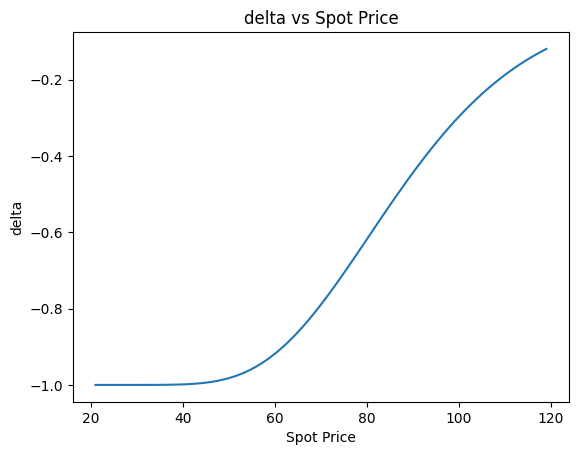

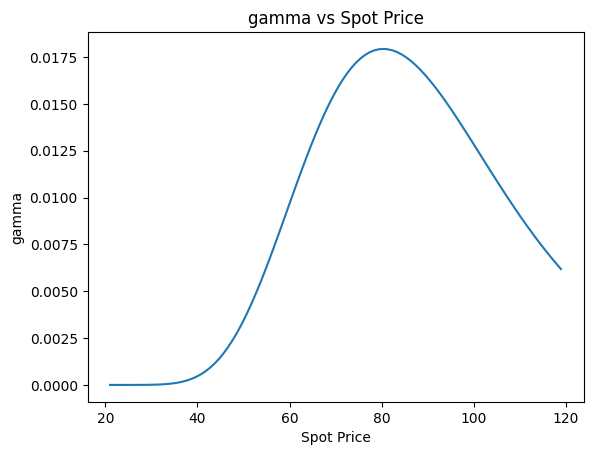

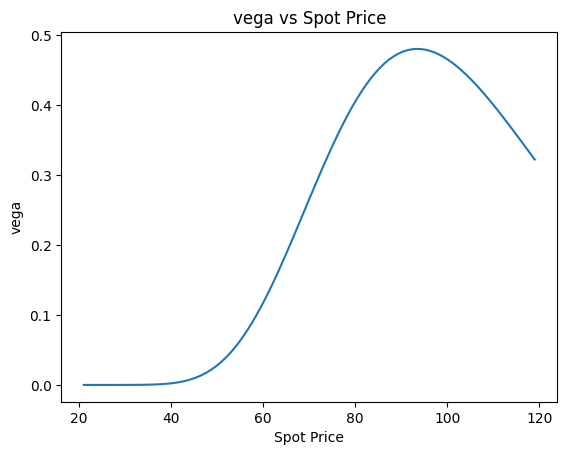

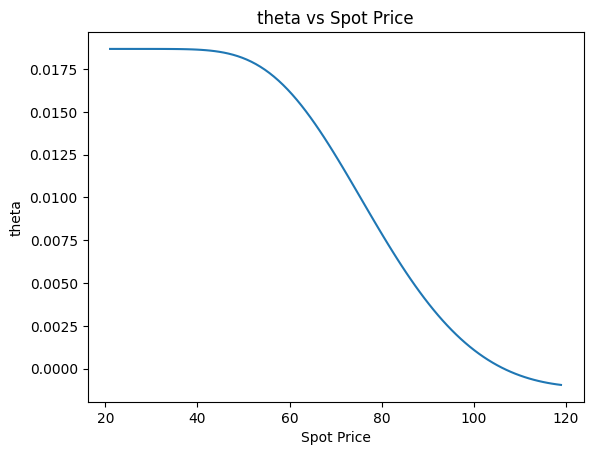

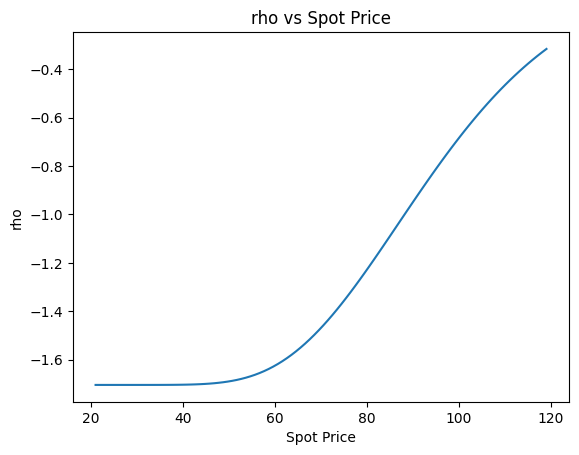

In [8]:
for i in ['delta','gamma','vega','theta','rho']:
    option.plot_greeks(i)